In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

# Load the dataset
data = pd.read_csv('game_dataset.csv')

# Split the data into features (X) and labels (y)
X = data[['age', 'stepCount', 'duration']]
y = data['level']

# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Adjust the labels to start from 0
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Create the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(5, activation='softmax')  # 5 output units for 5 levels
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with adjusted labels
model.fit(X_train, y_train_adjusted, epochs=100, batch_size=32, validation_data=(X_test, y_test_adjusted))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_adjusted)
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/100
25/25 [==============================] - 1s 13ms/step - loss: 1.4440 - accuracy: 0.5288 - val_loss: 1.1825 - val_accuracy: 0.6750
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 1.0314 - accuracy: 0.6988 - val_loss: 0.8177 - val_accuracy: 0.7500
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7439 - accuracy: 0.7550 - val_loss: 0.6027 - val_accuracy: 0.8200
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5796 - accuracy: 0.8200 - val_loss: 0.4895 - val_accuracy: 0.8650
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4781 - accuracy: 0.8475 - val_loss: 0.4126 - val_accuracy: 0.8750
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4077 - accuracy: 0.8700 - val_loss: 0.3574 - val_accuracy: 0.8800
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3573 - accuracy: 0.8838 - val_loss: 0.3120 - val_accuracy: 0.9000
Epoch 8/100


In [3]:
!pip install matplotlib

In [4]:
model.save('level.h5')

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [6]:
history = model.fit(X_train, y_train_adjusted, epochs=100, batch_size=32, validation_data=(X_test, y_test_adjusted))

Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0295 - accuracy: 0.9962 - val_loss: 0.0735 - val_accuracy: 0.9700
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 0.9975 - val_loss: 0.0654 - val_accuracy: 0.9750
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0278 - accuracy: 0.9975 - val_loss: 0.0831 - val_accuracy: 0.9550
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0273 - accuracy: 0.9975 - val_loss: 0.0754 - val_accuracy: 0.9650
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0281 - accuracy: 0.9962 - val_loss: 0.0816 - val_accuracy: 0.9600
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0267 - accuracy: 0.9950 - val_loss: 0.0788 - val_accuracy: 0.9700
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0263 - accuracy: 0.9987 - val_loss: 0.0686 - val_accuracy: 0.9700
Epoch 8/100
2

In [7]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_adjusted)
print(f"Test Accuracy: {test_accuracy}")

7/7 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 0.9650
Test Accuracy: 0.9649999737739563


In [8]:
# Calculate F1 score for the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
f1 = f1_score(y_test_adjusted, y_pred_classes, average='weighted')
print(f"Test F1 Score: {f1}")

7/7 [==============================] - 1s 15ms/step
Test F1 Score: 0.9646086068464027


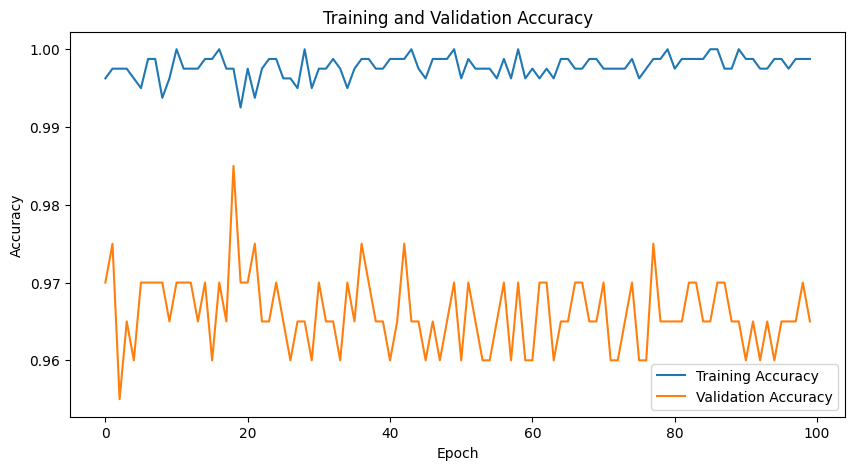

In [10]:
# Plot accuracy over training epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
